# Technical Analysis Of Intel

## Purpose
This phase of the project focuses on conducting an in-depth exploratory data analysis (EDA) of the selected stock. The goal is to extract valuable insights and explore key statistics that will lay the foundation for building a robust stock market forecasting system capable of providing actionable recommendations—Buy, Sell, or Hold.
### 1.0 Load Data and Calculate Key Statistics

## Potential stocks of interest 
    - INTC  
    - AAPL
    - INTC
    - MLTX
    - TSLA
    - HON


In [27]:
# Importing Libraries and Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import mplfinance as mpf
import plotly.graph_objects as go
from SimulateDay import * 

stock_df = select_stock()


2024-11-11 16:57:12,142 - ERROR - Could not get exchangeTimezoneName for ticker '' reason: 'chart'
2024-11-11 16:57:12,144 - ERROR - $: possibly delisted; no timezone found


Adding columns...
Halfway There...


### Preview Data with Additional Columns

In [28]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,1_Day_Return,5_Day_Return,...,Support_20_Day,Resistance_50_Day,Support_50_Day,Volume_MA_10,Volume_MA_20,Volume_MA_50,Optimal_Action,Action,Z-score,OBV


### Visualize Data
#### Line Chart of Closing Price

In [29]:
alt.data_transformers.disable_max_rows()
def plot_closing_price(df, company,opacity=1):
    filtered_df = df[df['Symbol'] == company]
    chart = alt.Chart(filtered_df).mark_line(color='black', opacity=opacity).encode(
        alt.X('Date:T', title='Date'),
        alt.Y('Close:Q', title='Closing Price'),
        alt.Tooltip(['Date:T', 'Close:Q', 'Volume:Q','RSI_10_Day']),
    ).properties(
        title=f'{company} Closing Price',
        width=800,
        height=400
    ).interactive(
        bind_y=False
    )
    return chart
plot_closing_price(stock_df, 'INTC')

alt.Chart(...)

#### CandleStick Chart

In [30]:

def plot_candlestick(df, company,window:list = None,SR_window=10):
    df = df[df['Date'] >= window]

    # Create the Candlesick Chart
    candlestick = go.Candlestick(
        x=df['Date'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name='Candlestick'
        )
    
    # Create the Volume Bar graph
    volume = go.Bar(
        x=df['Date'],
        y=df['Volume'],
        name='Volume',
        marker_color='blue',
        opacity=0.5,
        yaxis='y2'
    )

    # Create the Support and Resistance Lines
    support = go.Scatter(
        x=df['Date'],
        y=df[f'Support_{SR_window}_Day'],
        mode='lines',
        name=f'Support {SR_window} Day',
        line=dict(color='green', width=1)
    )

    resistance = go.Scatter(
        x=df['Date'],
        y=df[f'Resistance_{SR_window}_Day'],
        mode='lines',
        name=f'Resistance {SR_window} Day',
        line=dict(color='red', width=1)
    )

    # Create the Layout for the Chart (Title, Axis Labels, etc.)
    layout = go.Layout(
        title= f'{company} Candlestick Chart From {window[0]} to {window[1]}',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Price', showgrid=True),
        yaxis2=dict(title='Volume', overlaying='y', side='right', showgrid=False),
        xaxis_rangeslider_visible=False,
        hovermode='x unified', # Compare data points on hover
        plot_bgcolor='white'
    )

    # Layer all the charts together into one figure
    fig = go.Figure(
        data=[candlestick, volume, support, resistance],
        layout=layout
        )
    return fig
plot_candlestick(stock_df, 'INTC', window='2024-06-01',SR_window=20)


The candlestick comfirms much of what the closing price does but zooming in on the past 3 months we can see recent drop due to missing Q2 earning by .08%. Since then the stock has been pretty stagnat with few flucuations; mass hold possible breakout soon.  Recent signs show possible growth specifically with the engulfing candle on September 20th. Stock price rising higher than 20 day resistance, not worrying due to recent price drop, volume indicates significance with this breakout. Support Shift??

In [31]:

def plot_moving_average(df, company, color, MA,term):
    chart = alt.Chart(df).mark_line(color=color).encode(
        alt.X('Date:T', title='Date'),
        alt.Y(f'{MA}:Q', title='{MA}'),
        alt.Tooltip([MA,'Date', 'Close:Q', 'Volume:Q', 'Death_Cross_Short:O', 'Golden_Cross_Short:O', 'Death_Cross_Long:O', 'Golden_Cross_Long:O'])
    ).properties(
        title=f'{company} Moving Average {term}',
        width=800,
        height=400
    ).interactive(
        bind_y=False,
        
            )

    
    return chart
closing_price = plot_closing_price(stock_df, 'INTC', 0.5)
MA_10 = plot_moving_average(stock_df, 'INTC', 'green', 'MA_10','Short Term')
MA_20 = plot_moving_average(stock_df, 'INTC', 'blue', 'MA_20','Short Term')

MA_50 = plot_moving_average(stock_df, 'INTC', 'red', 'MA_50','Long Term')
MA_200 = plot_moving_average(stock_df, 'INTC', 'purple', 'MA_200','Long Term')
short_term_MA = alt.layer(MA_10, MA_20, closing_price)
medium_term_MA = alt.layer(MA_200, MA_50, closing_price)
MA_charts = alt.vconcat(short_term_MA, medium_term_MA)
MA_charts

alt.VConcatChart(...)

The averages also align with previos charts with Short Term Golden Cross also occuring on September 20th, this is a sign buyers will be stepping in and possible gain in the short term. Long term the averages are down with the 200 day showing signs of rise but the 50 day showing signs of decline, the stock price is however about to move above the 50 day average indicating medium term stock rise. Death Cross on May 2nd yet to uncross, not looking good long term
#### Bollinger Bands

In [32]:
def plot_bollinger_bands(df, company, band):
    # Filter data to specified stock and date range
    window=['2023-01-01', '2024-10-01']
    df = df[df['Date'] >= window[0]]
    df = df[df['Date'] <= window[1]]
    fig = go.Figure()

    # Create the Close Price Line Chart
    fig.add_trace(
        go.Scatter(
            x=df['Date'],
            y=df['Close'],
            mode='lines',
            name='Close Price'
        )
    )

    # Create the upper band
    fig.add_trace(
        go.Scatter(
            x=df['Date'],
            y=df[f'upper_band_{band}'],
            mode='lines',
            name='Upper Band',
            line=dict(color='red', width=1)
        )
    )

    # Create the lower band
    fig.add_trace(
        go.Scatter(
            x=df['Date'],
            y=df[f'lower_band_{band}'],
            mode='lines',
            fill='tonexty',
            fillcolor='rgba(128, 128, 128, 0.2)',
            name='Lower Band',
            line=dict(color='red', width=1)
        )
    )

    # Update layout
    fig.update_layout(
        title=f'Bollinger Bands for {band} Day Moving Average',
        xaxis_title='Date',
        yaxis_title='Price',
        legend_title='Legend',
        width=1000,
        height=600
    )

    fig.show()

band_10 = plot_bollinger_bands(stock_df, 'INTC', 10)
band_20 = plot_bollinger_bands(stock_df, 'INTC', 20)
band_50 = plot_bollinger_bands(stock_df, 'INTC', 50)
# band_200 = plot_bollinger_bands(stock_df, 'INTC', 200)

The bollinger bands are all widening which indicates a volitile stock, to be expected with possible breakout pending.

#### Relative Strength Index

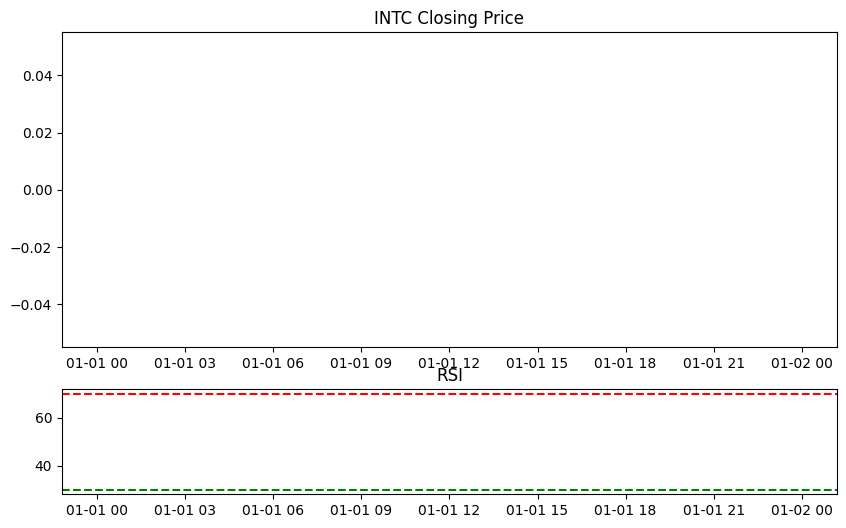

In [33]:
def plot_RSI(df, company,start):
    filtered_df = df[df['Symbol'] == company]
    filtered_df = filtered_df[filtered_df['Date'] >= start]
    fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(10, 6))
    
    axs[0].set_title(f'{company} Closing Price')
    axs[0].plot(filtered_df['Date'],filtered_df['Close'], color='black')
    axs[1].axhline(y=70, color='red', linestyle='--')
    axs[1].axhline(y=30, color='green', linestyle='--')
    axs[1].plot(filtered_df['Date'],filtered_df['RSI_10_Day'], color='orange')
    axs[1].set_title('RSI')
    plt.show()

plot_RSI(stock_df, 'INTC', '2024-06-01')

The RSI indicates that the stock is currently overbought which is likely due to the recent bullish signal from the candlestick chart, this likely lead to an increace of investors. This is worrying due to the signal often leading to a downtrend as seen in july.

In [34]:
from plotly.subplots import make_subplots

def plot_MACD(df, company, start, stop):
    
    # Filter the DataFrame for the specified company and date range
    df = df[(df['Symbol'] == company)] 
    df = df[df['Date'] >= start]
    df = df[df['Date'] <= stop]
    
    # Create a Plotly figure with two subplots
    fig = make_subplots(
        rows=2, 
        cols=1, 
        shared_xaxes=True, 
        vertical_spacing=0.1, 
        subplot_titles=('Close Price', 'MACD')
        )
    
    # Add Close Price graph
    fig.add_trace(go.Scatter(
        x=df['Date'], y=df['Close'],
        mode='lines',
        name='Close Price'
    ), row=1, col=1)
    
    # Add MACD line graph
    fig.add_trace(go.Scatter(
        x=df['Date'], y=df['MACD'],
        mode='lines',
        name='MACD',
        line=dict(color='red')
    ), row=2, col=1)
    
    # Add Signal line graph
    fig.add_trace(go.Scatter(
        x=df['Date'], y=df['Signal'],
        mode='lines',
        name='Signal',
        line=dict(color='blue')
    ), row=2, col=1)
    
    # Add MACD histogram 
    fig.add_trace(go.Bar(
        x=df['Date'], y=df['MACD_Hist'],
        name='MACD Histogram',
        marker_color=['green' if x > 0 else 'red' for x in df['MACD_Hist']]
    ), row=2, col=1)
    
    # Update layout
    fig.update_layout(
        title=f'MACD for {company}',
        xaxis_title='Date',
        yaxis_title='Price',
        legend_title='Legend',
        width=1000,
        height=600
    )
    
    fig.show()
start = pd.to_datetime('01-01-2024')
stop = pd.to_datetime('09-29-2024')
MACD = plot_MACD(stock_df, 'INTC', start, stop)


The MACD indicates that the best time to buy wouldve been around the middle of September, currently bullish signal.